<a href="https://colab.research.google.com/github/dipayandas97/Spiking-Neural-Network/blob/master/Neuron_simulation_LIF_Izhikevich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#LIF

In [0]:
#Simulation Parameters
T = 50                          #total simulation time (ms)
dt = 0.125                     #time step (ms)
time = np.arange(0, T+dt, dt)   #time array
t_rest = 0                      #initial refractory time

#LIF parameters
Vm = np.zeros((len(time)))      #potential trace over time (V)
Rm = 1                          #kOhm
Cm = 10                         #uF
tau_m = Rm * Cm                 #(ms)
tau_ref = 4                     #(ms)
Vth = 1                         #(V)
V_spike = 0.5                   #spike delta (V)

In [0]:
#input
I = 1.5

#iterate over each time step
for i,t in enumerate(time):
    if t > t_rest:
        Vm[i] = Vm[i-1] + (((I*Rm - Vm[i-1]) / tau_m) * dt)
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref

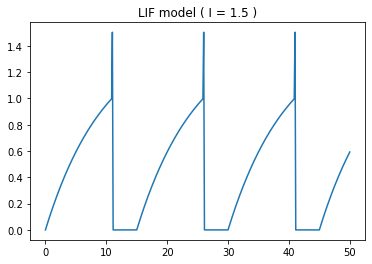

In [97]:
plt.title('LIF model ( I = 1.5 )')
plt.plot(time, Vm)
plt.show()

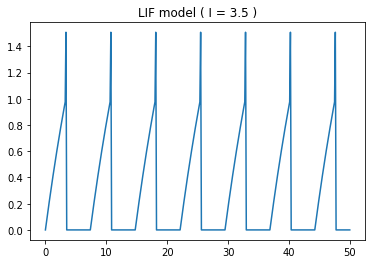

In [27]:
plt.title('LIF model ( I = 3.5 )')
plt.plot(time, Vm)
plt.show()

Time_constant : Scaling factor : Fractional : Multiplicative : C > 1, R > 1 :: Tau_m > 1

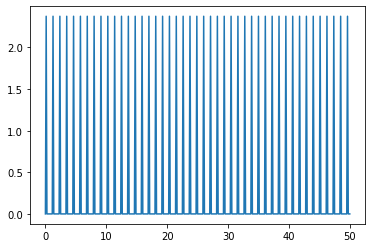

In [88]:
#Simulation Parameters
T = 50                          #total simulation time (ms)
dt = 0.125                      #time step (ms)
time = np.arange(0, T+dt, dt)   #time array
t_rest = 0                      #initial refractory time

#LIF parameters
Vm = np.zeros((len(time)))      #potential trace over time (V)
Rm = 1                          #kOhm
Cm = 10                         #uF
tau_m = Rm * Cm                 #(ms)
tau_ref = 1                     #(ms)
Vth = 1                         #(V)
V_spike = 0.5                   #spike delta (V)

#input
I = 1.5

#iterate over each time step
for i,t in enumerate(time):
    if t > t_rest:
        Vm[i] = Vm[i-1] + (((I*Rm - Vm[i-1]) * tau_m) * dt)
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref

plt.plot(time, Vm)
plt.show()

#Izhikevich

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class IzhNeuron:
    def __init__(self, label, a,b,c,d,v0,u0=None):
        self.label = label

        self.a = a
        self.b = b
        self.c = c
        self.d = d

        self.v = v0
        self.u = u0 if u0 is not None else b*v0

In [0]:
class IzhSim:
    def __init__(self, neuron, T, dt = 0.25):
        self.neuron = neuron
        self.dt = dt
        self.t = np.arange(0, T+1, dt)
        self.stim = np.zeros(len(self.t))
        self.x = 5
        self.y = 140
        self.du = lambda a,b,u,v: a*(b*v - u)

    def integrate(self, n=None):
        if n is None: n = self.neuron
        trace = np.zeros((2, len(self.t)))

        for i,j in enumerate(self.stim):
            n.v += self.dt * (0.04*n.v**2 + self.x*n.v + self.y - n.u + self.stim[i])
            n.u += self.dt * self.du(n.a, n.b, n.v, n.u)

            if n.v > 30: #V_threshold = 30mV
                trace[0,i] = 30
                n.v = n.c
                n.u += n.d
            else:
                trace[0,i] = n.v
                trace[1,i] = n.u
        return trace

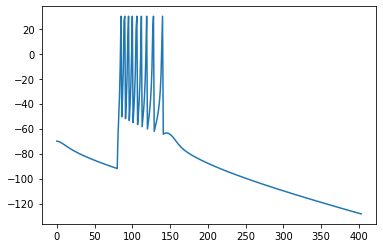

In [98]:
#Tonic Spiking
n = IzhNeuron('Tonic Spiking', a=0.02, b=0.2, c=-65, d=6, v0=-70)
s = IzhSim(n, T=100)
for i,t in enumerate(s.t):
    s.stim[i] = 100 if t>20 else 0

response = s.integrate()
plt.plot(response[0])

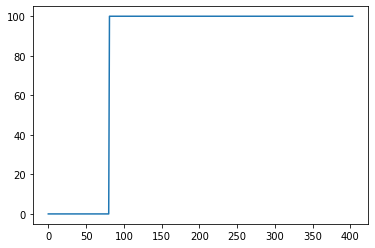

In [97]:
plt.plot(s.stim)